In [101]:
import pandas as pd
import numpy as np
import random

boston = pd.read_csv('Data_Set/housing.csv')
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

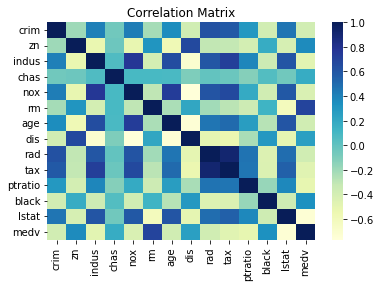

Features with high correlation to the housing prices:
indus
nox
rm
tax
ptratio
lstat


In [102]:
# data cleaning, analysing and removing noise from our model using correlation matrix
import matplotlib.pyplot as plt
import seaborn as sb

boston_frame = pd.DataFrame(boston, columns = features)
correlation_matrix = boston_frame.corr()

# plotting the correlation matrix
dataplot = sb.heatmap(correlation_matrix, cmap = "YlGnBu", annot = False)
dataplot.set_title('Correlation Matrix')
plt.show()

# sourceFile = open('Correlation_Matrix.txt', 'w')
# print(correlation_matirx, file = sourceFile)
# sourceFile.close()

correlation_matirx = np.array(correlation_matrix, dtype = 'float32')

print("Features with high correlation to the housing prices:")
lessCorrelated_features = []

for i in range(len(features) - 1):
    if(abs(correlation_matirx[13][i]) > 0.4):
        print(features[i])
    
    else:
        lessCorrelated_features.append(i)

In [103]:
# splitting the dataset into two parts for training and testing randomly in a ratio of 80:20
from sklearn.model_selection import train_test_split

boston_data = np.array(boston_frame, dtype = 'float32')
censored_data = []
boston_data = np.delete(boston_data, (lessCorrelated_features), 1)
for i in range(len(boston_data) - 13):
    if boston_data[i, -1] == 50:
        censored_data.append(i)

boston_data = np.delete(boston_data, (censored_data), 0)
features = boston_data[:, :-1]
prices = boston_data[:, -1]

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 42)

In [104]:
# standardizing the data through feature scaling
def standardize(x):
    return (x - x.mean(axis = 0)) / x.std(axis = 0)

x_train = standardize(x_train)
y_train = standardize(y_train)
x_test = standardize(x_test)
y_test = standardize(y_test)

In [105]:
# cost function and gradient descent functions

def error(num, theta, x, y):
    cost = 0

    for i in range(num):
        temp = 0
        for j in range(n + 1):
            if j == 0:
                temp += theta[j]
            else:
                temp += (theta[j] * x[i][j - 1])

        cost += ((temp - y[i]) ** 2)

    return cost / (2 * num)

def gradient_descent(alpha, theta, x, y):
    temp = np.zeros(n + 1)

    for i in range(m):
        derivation = 0
        for j in range(n + 1):
            if j == 0:
                derivation += theta[j]
            else:
                derivation += (theta[j] * x[i][j - 1])

        derivation = (derivation - y[i])

        for j in range(n + 1):
            if j == 0:
                temp[j] += derivation
            else:
                temp[j] += (derivation * x[i][j - 1])

    temp = alpha * temp / m
    theta -= temp

    return theta

In [106]:
theta = []
alpha = 0.3
iterations = 75
# m = number of training examples, n = number of features
m = len(y_train)
n = 13 - len(lessCorrelated_features)

for _ in range(n + 1):
    theta.append(random.random())

for _ in range(iterations):
    theta = gradient_descent(alpha, theta, x_train, y_train)

In [107]:
print(error(len(y_test), theta, x_test, y_test))

0.1404463925182932


In [108]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

for i in range(len(y_test)):
    price = 0
    for j in range(n + 1):
        if j == 0:
            price += theta[j]
        else:
            price += (theta[j] * x_test[i][j - 1])
    
    print(price, model.predict(x_test[i].reshape(1, -1)))

-0.7510988398508058 [-0.7509763]
0.5594941317331688 [0.55938053]
-0.24075289302222888 [-0.24100713]
-1.4269416231330507 [-1.4270666]
-1.1392500785100146 [-1.1393248]
-0.1591035293946212 [-0.15888497]
-0.9255426288328743 [-0.92612183]
1.7388804037680892 [1.7384518]
-0.47887950316368666 [-0.47855648]
1.013113232114646 [1.0131449]
0.257086753364212 [0.2568863]
-0.2952730122774546 [-0.296268]
-1.6244626064282084 [-1.6253701]
-0.8662493209226896 [-0.86683965]
-0.5945361192929828 [-0.5952073]
0.5975249438602933 [0.5974783]
-0.5213879733804863 [-0.52135086]
-0.5068095730330662 [-0.5066067]
-0.07985570485519244 [-0.08029429]
0.03707186531070536 [0.03658489]
0.17138499863757065 [0.17121568]
0.3450070092375575 [0.34480587]
-1.073720029293665 [-1.073642]
1.4572399233763074 [1.4569068]
0.22006667442425215 [0.21989231]
0.22242089709656665 [0.22247334]
0.3056429800985536 [0.3057453]
1.29863951459147 [1.2986814]
1.651919128791568 [1.6518463]
-0.9895411690705562 [-0.98930043]
0.4841044909770777 [0.484